In [1]:
import pandas as pd
import numpy as np

df_dd = pd.read_csv('data/AustralianWines.csv')

# rename columns

df_dd.rename(columns={'Month':'Date','Red':'Wine_Sales'},inplace = True)

In [2]:
df_dd.head()

,Date,Wine_Sales
0,1/1/1980,464
1,2/1/1980,675
2,3/1/1980,703
3,4/1/1980,887
4,5/1/1980,1139


In [3]:
df_dd.describe(include='all')

,Date,Wine_Sales
count,180,180.000000
unique,180,NaN
top,1/1/1980,NaN
freq,1,NaN
mean,NaN,1629.727778
std,NaN,614.933333
min,NaN,464.000000
25%,NaN,1123.000000
50%,NaN,1559.000000
75%,NaN,2106.250000


In [4]:
# conver df to time series
df_dd['Date'] = pd.to_datetime(df_dd.Date,format='%m/%d/%Y')
wine_ts_dd = pd.Series(df_dd.Wine_Sales.values,index=df_dd.Date,name='Wine_Sales')
wine_ts_dd

Date
1980-01-01     464
1980-02-01     675
1980-03-01     703
1980-04-01     887
1980-05-01    1139
              ... 
1994-08-01    2665
1994-09-01    2639
1994-10-01    2226
1994-11-01    2586
1994-12-01    2684
Name: Wine_Sales, Length: 180, dtype: int64

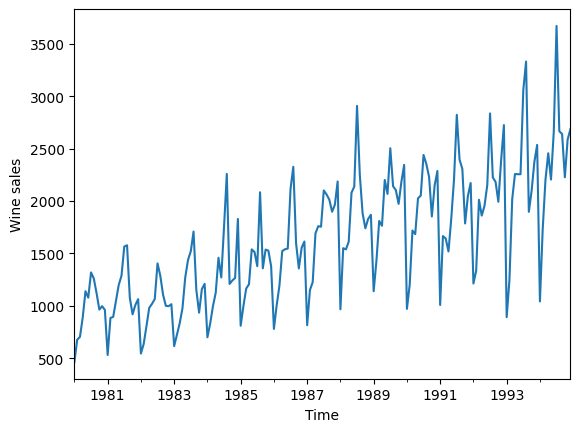

In [5]:
import matplotlib.pylab as plt

ax=wine_ts_dd.plot()
ax.set_xlabel('Time')
ax.set_ylabel('Wine sales')
plt.show()

In [6]:
# split data for model 

nValid=24
nTrain=len(wine_ts_dd)-nValid
train_ts_dd=wine_ts_dd[:nTrain]
valid_ts_dd=wine_ts_dd[nTrain:]

In [7]:
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools, stattools

In [8]:
ts_df_dd = tsatools.add_trend(wine_ts_dd,trend='ct')
ts_df_dd['Month'] = ts_df_dd.index.month

In [9]:
ts_df_dd

,Wine_Sales,const,trend,Month
Date,,,,
1980-01-01,464,1.0,1.0,1
1980-02-01,675,1.0,2.0,2
1980-03-01,703,1.0,3.0,3
1980-04-01,887,1.0,4.0,4
1980-05-01,1139,1.0,5.0,5
...,...,...,...,...
1994-08-01,2665,1.0,176.0,8
1994-09-01,2639,1.0,177.0,9
1994-10-01,2226,1.0,178.0,10


In [10]:
train_dfdd=ts_df_dd[:nTrain]
valid_dfdd=ts_df_dd[nTrain:]

In [11]:
# linear trend model 
wine_lm_dd = sm.ols(formula='Wine_Sales ~ trend',data=train_dfdd).fit()

In [12]:
wine_lm_dd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Wine_Sales   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     180.8
Date:                Mon, 21 Apr 2025   Prob (F-statistic):           9.22e-28
Time:                        21:45:06   Log-Likelihood:                -1143.3
No. Observations:                 156   AIC:                             2291.
Df Residuals:                     154   BIC:                             2297.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    831.8371     59.688     13.936      0.000     713.924     949.750
trend          8.8695      0.660     13.448      0.000       7.567      10.172
==============================================================================
Omnibus:                        1.726   Durbin-Watson:                   1.080
Prob(Omnibus):                  0.422   Jarque-Bera (JB):                1.387
Skew:                          -0.052   Prob(JB):                        0.500
Kurtosis:                       3.450   Cond. No.                         182.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
from dmba import regressionSummary

no display found. Using non-interactive Agg backend


In [14]:
predict_lm_dd=wine_lm_dd.predict(valid_dfdd)
regressionSummary(valid_ts_dd,predict_lm_dd)


Regression statistics

                      Mean Error (ME) : -35.9661
       Root Mean Squared Error (RMSE) : 606.8201
            Mean Absolute Error (MAE) : 427.9007
          Mean Percentage Error (MPE) : -12.5160
Mean Absolute Percentage Error (MAPE) : 25.2636


In [15]:
# seasonality model 
wine_lm_season_dd = sm.ols(formula='Wine_Sales ~ C(Month)',data=train_dfdd).fit()

In [16]:
wine_lm_season_dd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Wine_Sales   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     8.406
Date:                Mon, 21 Apr 2025   Prob (F-statistic):           2.57e-11
Time:                        21:45:06   Log-Likelihood:                -1165.2
No. Observations:                 156   AIC:                             2354.
Df Residuals:                     144   BIC:                             2391.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        811.3077    122.433      6.627      0.000     569.310    1053.305
C(Month)[T.2]    271.3846    173.146      1.567      0.119     -70.851     613.620
C(Month)[T.3]    460.1538    173.146      2.658      0.009     117.918     802.390
C(Month)[T.4]    563.0769    173.146      3.252      0.001     220.841     905.313
C(Month)[T.5]    804.6923    173.146      4.647      0.000     462.457    1146.928
C(Month)[T.6]    847.3077    173.146      4.894      0.000     505.072    1189.543
C(Month)[T.7]   1239.4615    173.146      7.158      0.000     897.226    1581.697
C(Month)[T.8]   1182.5385    173.146      6.830      0.000     840.303    1524.774
C(Month)[T.9]    829.3077    173.146      4.790      0.000     487.072    1171.543
C(Month)[T.10]   664.3846    173.146      3.837      0.000     322.149    1006.620
C(Month)[T.11]   808.6154    173.146      4.670      0.000     466.380    1150.851
C(Month)[T.12]   930.4615    173.146      5.374      0.000     588.226    1272.697
==============================================================================
Omnibus:                       39.734   Durbin-Watson:                   0.292
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.908
Skew:                           0.025   Prob(JB):                       0.0192
Kurtosis:                       1.898   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
predict_lm_season = wine_lm_season_dd.predict(valid_dfdd)
regressionSummary(valid_ts_dd,predict_lm_season)


Regression statistics

                      Mean Error (ME) : 762.2853
       Root Mean Squared Error (RMSE) : 838.6621
            Mean Absolute Error (MAE) : 762.2853
          Mean Percentage Error (MPE) : 31.4759
Mean Absolute Percentage Error (MAPE) : 31.4759


In [18]:
# linear trend and seasonality 
wine_lm_trendseason_dd = sm.ols(formula='Wine_Sales ~ trend + np.square(trend) + C(Month)',data=train_dfdd).fit()

In [19]:
wine_lm_trendseason_dd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Wine_Sales   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     85.55
Date:                Mon, 21 Apr 2025   Prob (F-statistic):           2.38e-60
Time:                        21:45:06   Log-Likelihood:                -1033.9
No. Observations:                 156   AIC:                             2096.
Df Residuals:                     142   BIC:                             2139.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          177.5683     68.279      2.601      0.010      42.593     312.543
C(Month)[T.2]      262.8345     75.186      3.496      0.001     114.206     411.463
C(Month)[T.3]      443.0593     75.188      5.893      0.000     294.426     591.692
C(Month)[T.4]      537.4435     75.192      7.148      0.000     388.803     686.084
C(Month)[T.5]      770.5258     75.198     10.247      0.000     621.874     919.178
C(Month)[T.6]      804.6137     75.205     10.699      0.000     655.948     953.279
C(Month)[T.7]     1188.2457     75.213     15.798      0.000    1039.563    1336.928
C(Month)[T.8]     1122.8065     75.223     14.926      0.000     974.104    1271.509
C(Month)[T.9]      761.0652     75.235     10.116      0.000     612.340     909.790
C(Month)[T.10]     587.6373     75.248      7.809      0.000     438.886     736.388
C(Month)[T.11]     723.3688     75.263      9.611      0.000     574.589     872.149
C(Month)[T.12]     836.7215     75.279     11.115      0.000     687.909     985.534
trend                8.9661      1.372      6.536      0.000       6.254      11.678
np.square(trend)    -0.0028      0.008     -0.334      0.739      -0.020       0.014
==============================================================================
Omnibus:                        3.338   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.188   Jarque-Bera (JB):                3.081
Skew:                           0.204   Prob(JB):                        0.214
Kurtosis:                       3.555   Cond. No.                     1.37e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
predict_lm_trendseason = wine_lm_trendseason_dd.predict(valid_dfdd)
regressionSummary(valid_ts_dd,predict_lm_trendseason)


Regression statistics

                      Mean Error (ME) : 12.6374
       Root Mean Squared Error (RMSE) : 339.1057
            Mean Absolute Error (MAE) : 259.7121
          Mean Percentage Error (MPE) : -4.8302
Mean Absolute Percentage Error (MAPE) : 14.1887


In [21]:
# exponential smoothing 
from statsmodels.tsa.api import ExponentialSmoothing
SES_dd = ExponentialSmoothing(train_ts_dd,initialization_method='estimated').fit()

/Users/danielduque/Wine_Sales_Time_Series/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [22]:
predict_SES = SES_dd.forecast(len(valid_ts_dd))

In [23]:
SES_dd.model.params

{'smoothing_level': np.float64(0.649292299898049),
 'smoothing_trend': np.float64(nan),
 'smoothing_seasonal': np.float64(nan),
 'damping_trend': nan,
 'initial_level': np.float64(553.1588746430598),
 'initial_trend': np.float64(nan),
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [24]:
regressionSummary(valid_ts_dd,predict_SES)


Regression statistics

                      Mean Error (ME) : -277.9548
       Root Mean Squared Error (RMSE) : 688.4836
            Mean Absolute Error (MAE) : 506.6516
          Mean Percentage Error (MPE) : -24.8153
Mean Absolute Percentage Error (MAPE) : 31.7838
